<b>Starting with library importing</b>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [15]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [16]:
df=pd.read_csv("Hotel_Reviews.csv",parse_dates=['Review_Date'],nrows=20000)
df.shape

(4279, 17)

In [17]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [18]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

<b>Extracting the reviews on positive and negative data</b

In [19]:
df['review']=df['Negative_Review']+df['Positive_Review']
df['review']

0        I am so angry that i made this post available...
1       No Negative No real complaints the hotel was g...
2        Rooms are nice but for elderly a bit difficul...
3        My room was dirty and I was afraid to walk ba...
4        You When I booked with your company on line y...
                              ...                        
4274     Returned 1530 to get ready for an early eveni...
4275     I was disappointed with both of the rooms I b...
4276     The breakfast was ok but I would except much ...
4277     Twin room Bathroom was ridiculously tiny a re...
4278     The air conditioning was difficult to control...
Name: review, Length: 4279, dtype: object

In [20]:
df['review_type']=df['Reviewer_Score'].apply(lambda x:"negative" if x<7 else "positive")
df['review_type']

0       negative
1       positive
2       positive
3       negative
4       negative
          ...   
4274    negative
4275    negative
4276    positive
4277    positive
4278    positive
Name: review_type, Length: 4279, dtype: object

In [21]:
df['Reviewer_Score'].unique()

array([ 2.9,  7.5,  7.1,  3.8,  6.7,  4.6, 10. ,  6.5,  7.9,  5.8,  9.2,
        8.8,  6.3,  5.4,  9.6,  8.3,  4.2,  3.3,  5. ,  2.5,  3.1,  6. ,
        5.5,  9.5,  8. ,  8.5,  9. ,  4.5,  7. ,  5.6,  nan])

In [22]:
df['review_type'].value_counts()

positive    3399
negative     880
Name: review_type, dtype: int64

In [23]:
df=df[['review','review_type']]
df

,review,review_type
0,I am so angry that i made this post available...,negative
1,No Negative No real complaints the hotel was g...,positive
2,Rooms are nice but for elderly a bit difficul...,positive
3,My room was dirty and I was afraid to walk ba...,negative
4,You When I booked with your company on line y...,negative
...,...,...
4274,Returned 1530 to get ready for an early eveni...,negative
4275,I was disappointed with both of the rooms I b...,negative
4276,The breakfast was ok but I would except much ...,positive
4277,Twin room Bathroom was ridiculously tiny a re...,positive


In [24]:
df

,review,review_type
0,I am so angry that i made this post available...,negative
1,No Negative No real complaints the hotel was g...,positive
2,Rooms are nice but for elderly a bit difficul...,positive
3,My room was dirty and I was afraid to walk ba...,negative
4,You When I booked with your company on line y...,negative
...,...,...
4274,Returned 1530 to get ready for an early eveni...,negative
4275,I was disappointed with both of the rooms I b...,negative
4276,The breakfast was ok but I would except much ...,positive
4277,Twin room Bathroom was ridiculously tiny a re...,positive


Text(0.5, 1.0, 'Review type')

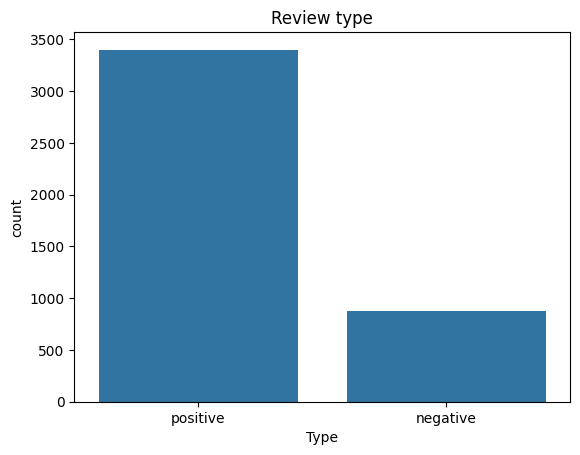

In [25]:
sns.countplot(
  x='review_type',
  data=df,
  order=df.review_type.value_counts().index
)
plt.xlabel("Type")
plt.title("Review type")

In [26]:
positive_review=df[df.review_type=='positive']
negative_review=df[df.review_type=='negative']

In [27]:
positive_df=positive_review.sample(n=len(negative_review),random_state=RANDOM_SEED)
negative_df=negative_review

In [28]:
review_df=pd.concat([positive_df,negative_df]).reset_index(drop=True)

In [29]:
review_df.shape

(1760, 2)

In [30]:
review_df.head()

,review,review_type
0,No Negative The hotel is amazing beautiful old...,positive
1,Nothing I didn t like The room was comfy the...,positive
2,room was on the ground floor named club room ...,positive
3,Nothing Great location Excellent friendly eff...,positive
4,The hotel is nice but the facilities are poor...,positive


Text(0.5, 1.0, 'Review type(resampled)')

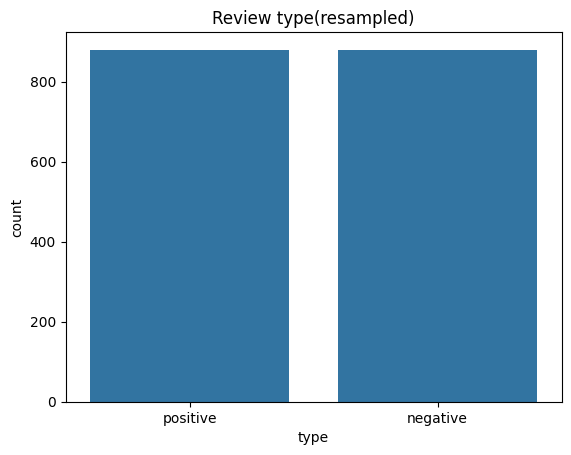

In [31]:
sns.countplot(
  x='review_type',
    data=review_df,
    order=review_df.review_type.value_counts().index
)
plt.xlabel("type")
plt.title("Review type(resampled)")

In [32]:
review_df['review_type'].value_counts()

positive    880
negative    880
Name: review_type, dtype: int64

In [33]:
sentiment_label=review_df.review_type.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [34]:
review=review_df.review.values
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review)
vocab_size=len(tokenizer.word_index)+1
encoded_docs=tokenizer.texts_to_sequences(review)
padded_sequences=pad_sequences(encoded_docs,maxlen=200)

In [35]:
print(review[2])
print(encoded_docs[2])

 room was on the ground floor named club room indeed good in size but with strange dispositioning of wardrobe hairdryer  Location polite good staff especially at breakfas very good bed
[6, 3, 22, 1, 445, 93, 1670, 232, 6, 1268, 25, 7, 136, 26, 21, 912, 2783, 9, 340, 783, 20, 259, 25, 14, 341, 30, 2039, 8, 25, 31]


In [36]:
embedding_vector_length=32
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           171648    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 188299 (735.54 KB)
Trainable params: 188299 (735.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [37]:
history=model.fit(padded_sequences,sentiment_label[0],validation_split=0.2,epochs=5,batch_size=32)

Epoch 1/5
44/44 [==============================] - 14s 252ms/step - loss: 0.6497 - accuracy: 0.6200 - val_loss: 1.5896 - val_accuracy: 0.0000e+00
Epoch 2/5
44/44 [==============================] - 10s 227ms/step - loss: 0.5861 - accuracy: 0.7045 - val_loss: 1.3113 - val_accuracy: 0.2159
Epoch 3/5
44/44 [==============================] - 14s 316ms/step - loss: 0.4666 - accuracy: 0.8018 - val_loss: 1.3143 - val_accuracy: 0.2159
Epoch 4/5
44/44 [==============================] - 10s 233ms/step - loss: 0.3590 - accuracy: 0.8551 - val_loss: 0.9072 - val_accuracy: 0.4631
Epoch 5/5
44/44 [==============================] - 10s 229ms/step - loss: 0.3105 - accuracy: 0.8793 - val_loss: 1.1483 - val_accuracy: 0.4602


In [38]:
def predict_sentiment(text):
    tw=tokenizer.texts_to_sequences([text])
    tw=pad_sequences(tw,maxlen=200)
    predict=int(model.predict(tw).round().item())
    print("Predicted label:",sentiment_label[1][predict])

In [39]:
test_sentence1='This hotel is fantastic'
predict_sentiment(test_sentence1)

test_sentence2='This hotel is not my type'
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 314ms/step
Predicted label: positive
1/1 [==============================] - 0s 39ms/step
Predicted label: positive


In [40]:
model.save_weights('model.h5')